In [46]:
import numpy as np
import pandas as pd
import os
import glob
from astropy.io import fits
import emcee
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.time import Time
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits
from astropy.table import Table
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set_context('paper')

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [47]:
df = pd.read_csv('../data/io_results_june_6.csv')

In [48]:
df

,brightness,gaussian_width,gaussian_width_unc,int_wv,obs_line_center,obs_line_center_unc
0,1.960000e-16,0.636250,1.336774e-01,1208.8500,1209.043569,1.190795e-01
1,4.310000e-16,0.977413,3.977859e-01,1211.2120,1211.759708,3.632093e-01
2,1.960000e-16,0.636250,1.336774e-01,1208.8500,1209.043569,1.190795e-01
3,4.310000e-16,0.977413,3.977859e-01,1211.2120,1211.759708,3.632093e-01
4,3.030000e-15,1.178948,3.071002e-01,1218.5950,1217.078784,5.897403e-01
5,1.960000e-16,0.636250,1.336774e-01,1208.8500,1209.043569,1.190795e-01
6,4.310000e-16,0.977413,3.977859e-01,1211.2120,1211.759708,3.632093e-01
7,3.030000e-15,1.178948,3.071002e-01,1218.5950,1217.078784,5.897403e-01
8,5.550000e-17,0.236782,3.254980e-02,1224.4240,1224.491583,3.254980e-02
9,5.550000e-17,0.236773,3.208147e-02,1224.4790,1224.491578,3.208147e-02


In [49]:
df_wv = df['int_wv']
df_obs = df['obs_line_center']
df_brightness=df['brightness']

In [50]:
df_diff = df_wv-df_obs
df_diff

0    -0.193569
1    -0.547708
2    -0.193569
3    -0.547708
4     1.516216
5    -0.193569
6    -0.547708
7     1.516216
8    -0.067583
9    -0.012578
10    0.052420
11    0.069214
12   -0.190570
13   -0.050877
14   -0.062254
15    0.820637
16    0.193769
17   -0.540618
18   -0.512596
19    0.027609
20    3.747102
21   -0.000107
22    1.254325
23    0.000000
24   -0.046498
25    0.475708
26    0.098030
27    0.623992
28    0.874130
29    1.562949
30    2.482014
31   -0.053002
32    0.097294
33   -0.021238
34    0.054763
35   -0.032977
36   -0.025977
37   -0.042388
38    0.070513
39   -0.007904
40   -0.034892
41    0.684033
42   -0.007853
43   -0.017267
44   -0.004515
45    0.011959
46   -0.074025
47   -0.043648
48    0.145352
49    0.000000
50    0.000000
51    0.000000
dtype: float64

Let's see if we can tell how much the lines shifted based on the MCMC process which also predicts a center wavelength.

0.23663551923073975
0.7614701230045292


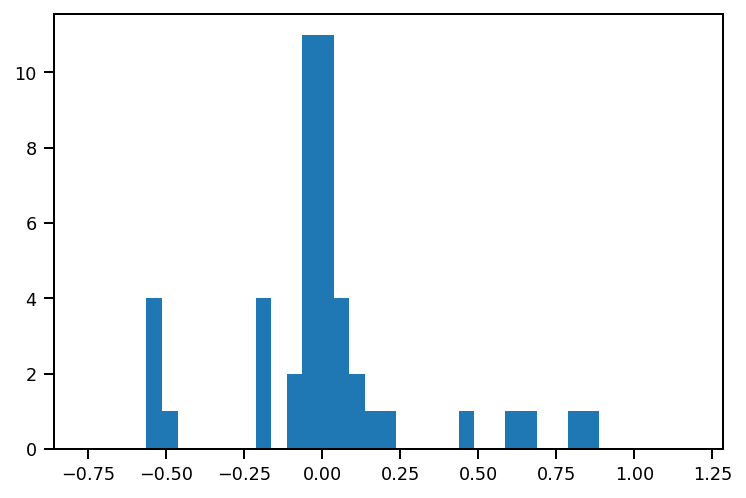

In [51]:
diff_mean = np.mean(df_diff)
diff_std = np.std(df_diff)
plt.hist(df_diff, bins = np.arange(diff_mean-1, diff_mean+1, 0.05));
print(diff_mean)
print(diff_std)

In [52]:
hdulist = fits.open('../data/composite_Io_eclipsed.fits')
evt_data = Table(hdulist[1].data)
image_data = hdulist[1].data
df = pd.read_csv('../data/Io_Master_Line_List (1).csv') #spaces in csv file will make df object type and not float64
line = "S I"
target_mask = df.Species.str.endswith(line) #probably a better function but idk it right now
df = df[target_mask]
df_wavelength = df['Wavelength']
df_species = df['Species']

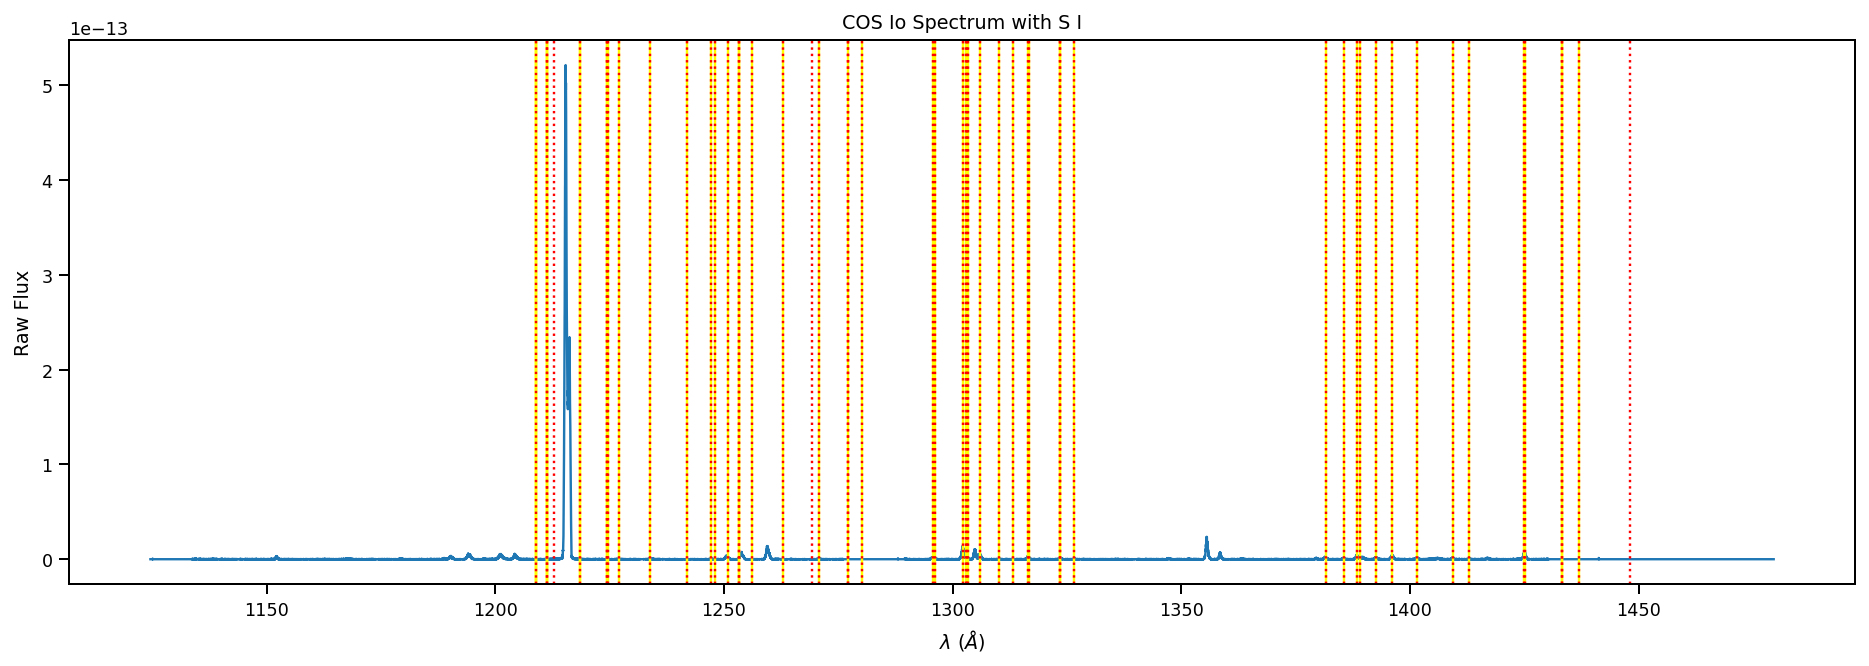

In [53]:
plt.figure(figsize=(16, 5))
plt.plot(evt_data['WAVELENGTH'].T, evt_data['FLUX'].T) #make it columns instead of rows bc otherwise will be a blank plot
plt.xlabel('$\lambda$ ($\AA$)');
plt.ylabel('Raw Flux')
plt.title("COS Io Spectrum with S I")
for y in df_wv:
    plt.axvline(x=y, color = 'yellow')
for xc in df_wavelength:
    plt.axvline(x=xc, color = 'red', linestyle = 'dotted')
#plt.xlim(1250,1300)

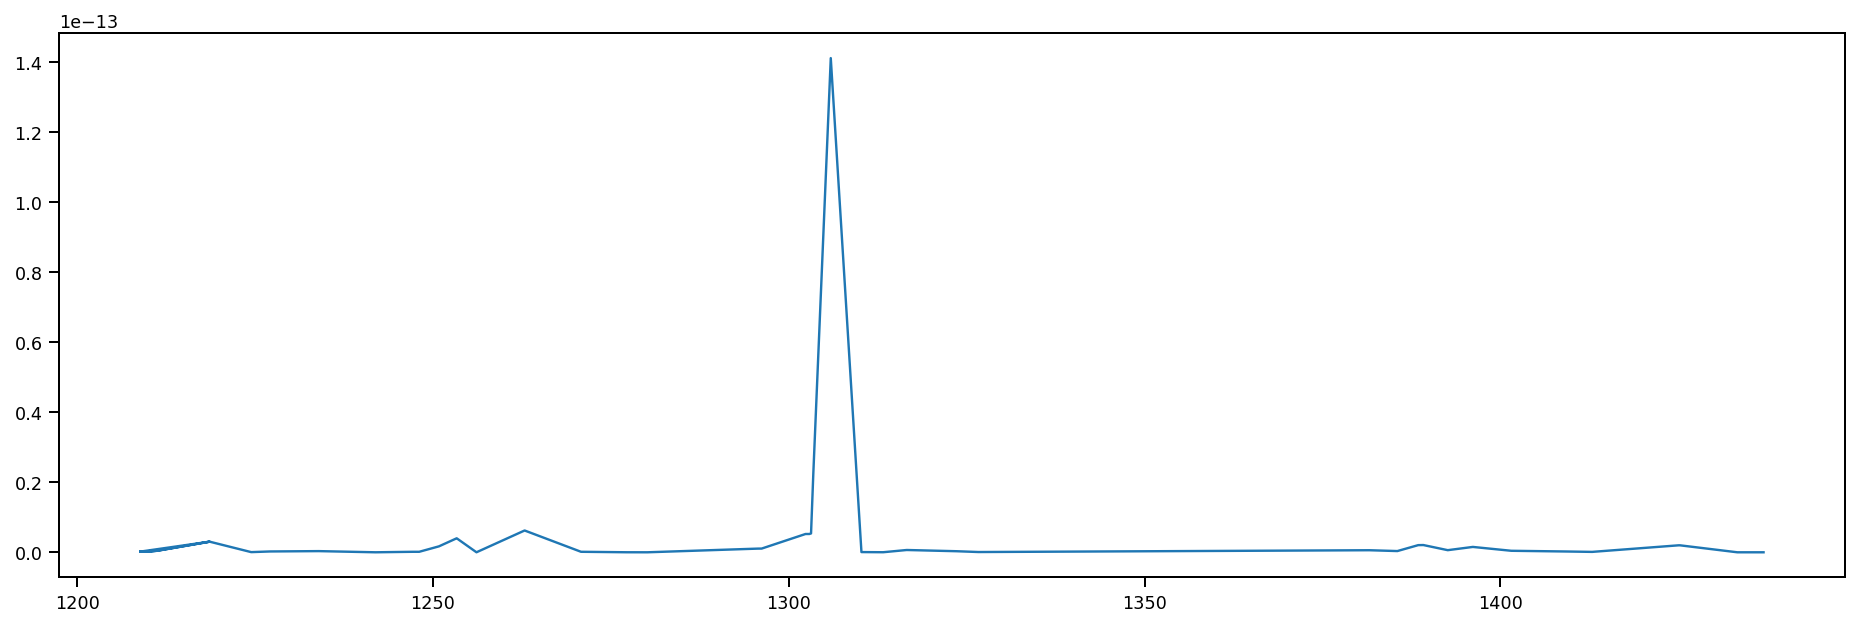

In [55]:
plt.figure(figsize=(16, 5))
plt.plot(df_wv, df_brightness) #make it columns instead of rows bc otherwise will be a blank plot